In [2]:
# Data Preprocessing
#Install packages if not available like statsbomb
# Go to CMD & type: python -m pip install <package-name>
import statsbomb as sb
import pandas as pd
import numpy as np

In [5]:
# Plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
import scikitplot as skplt

In [7]:
# Machine learning
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
#from imblearn.over_sampling import SMOTE
from collections import Counter

In [8]:
# Get a list of the available competitions
comps = sb.Competitions()

In [9]:
# Get underlying json data
json_data = comps.data

In [10]:
df = comps.get_dataframe()
df

,competition_id,competition_name,country_name,match_available,match_updated,season_id,season_name
0,37,FA Women's Super League,England,2018-12-29T15:31:50.002883,2018-12-29T15:31:50.002883,4,2018/2019
1,43,FIFA World Cup,International,2018-11-19T10:40:22.087513,2018-11-19T10:40:22.087513,3,2018
2,49,NWSL,United States of America,2018-11-03T20:33:13.451301,2018-11-20T14:33:28.815129,3,2018


In [11]:
# Get all FA WSL matches
fawsl_matches = sb.Matches('37').get_dataframe()
 
# Get all NWSL matches
nwsl_matches = sb.Matches('49').get_dataframe()
 
# Combine into a single dataframe
matches = fawsl_matches.append(nwsl_matches)
matches.head()

,away_score,away_team,competition,data_version,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,referee_name,season,stadium_name
0,2,971,37,1.0.3,0,972,15:00:00.000,2018-11-16T20:32:28.253606,2018-11-04,19751,available,None,4,None
1,1,969,37,1.0.3,0,974,15:00:00.000,2018-10-31T21:28:32.325274,2018-09-23,19727,available,None,4,None
2,0,974,37,1.0.3,0,972,20:45:00.000,2018-10-31T21:28:32.325274,2018-09-19,19719,available,None,4,The Rush Green Stadium
3,1,970,37,1.0.3,2,972,15:00:00.000,2018-10-31T21:28:32.325274,2018-09-30,19731,available,None,4,None
4,0,965,37,1.0.3,2,971,14:00:00.000,2018-10-31T21:28:32.325274,2018-09-30,19730,available,None,4,None


In [12]:
# Create a list of all match ids
match_list = matches['match_id'].tolist()
 
# Create a blank dataframe for all shot events
shots_df = pd.DataFrame()
 
# Loop through the events database and pull out all shot events for each match in match_list
for i in match_list:
    events = sb.Events(event_id=i)
    df = events.get_dataframe(event_type='shot')
    shots_df = shots_df.append(df)
     
shots_df.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
0,shot,be76791e-ddde-4814-9af2-51435b504b33,44,1,00:01:37.689,1,37,5,Chelsea LFC,Regular Play,...,None,None,None,None,None,85.0,30.0,88.0,31.0,NaN
1,shot,dc22d90c-9fb4-4376-aa2a-975918e5b554,359,1,00:13:06.405,13,6,28,Chelsea LFC,From Corner,...,None,None,None,None,None,115.0,32.0,120.0,45.6,1.3
2,shot,dd0027d6-0bba-4c2c-8f70-d336737ef1ff,371,1,00:13:36.645,13,36,29,West Ham United LFC,From Goal Kick,...,None,None,None,None,None,109.0,21.0,117.0,65.0,NaN
3,shot,80c97350-d5e8-44c0-a2f2-93ca1085ff58,388,1,00:14:01.505,14,1,30,Chelsea LFC,Regular Play,...,None,None,True,None,None,107.0,44.0,114.0,39.5,0.5
4,shot,c3decc71-9395-4ab0-b85f-40e13bbc619b,649,1,00:23:18.653,23,18,47,Chelsea LFC,From Free Kick,...,None,None,None,None,None,104.0,45.0,117.0,39.8,1.7


In [13]:
# Print some details about the dataset
print(len(shots_df), "shots is not a huge sample to work with!")
print("")
 
print("The dataset contains the following columns:")
print(list(shots_df))
print("")
 
print("Unique values in the 'type' column:")
print(shots_df['type'].unique())
print("")
 
print("Unique values in the 'play_pattern' column:")
print(shots_df['play_pattern'].unique())

2556 shots is not a huge sample to work with!

The dataset contains the following columns:
['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg', 'key_pass_id', 'body_part', 'type', 'outcome', 'technique', 'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y', 'end_location_z']

Unique values in the 'type' column:
['Open Play' 'Free Kick' 'Penalty']

Unique values in the 'play_pattern' column:
['Regular Play' 'From Corner' 'From Goal Kick' 'From Free Kick'
 'From Counter' 'From Throw In' 'From Keeper' 'From Kick Off' 'Other']


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Average conversion rate: 9.65%



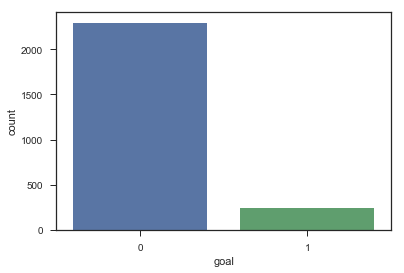

In [14]:
# Remove penalties from the data
np_shots = shots_df[shots_df['type'] != 'Penalty']
 
# Create a goal column, where 1 = goal and 0 = no goal
np_shots['goal'] = np.where(np_shots['outcome'] == 'Goal', 1, 0)
 
# Calculate average shot conversion rate
attempts = len(np_shots)
goals = sum(np_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print("Average conversion rate:", "{0:.2f}%".format(conversion_rate*100))
print("")
 
# Plot the count of 'goal' and 'no goal' events to show imbalance
sns.set(style="ticks", color_codes=True)
sns.countplot(x="goal", data=np_shots)

In [15]:
# Feature engineering
# Reset index
np_shots = np_shots.reset_index().drop('level_0', axis=1)
 
# Create a column to show whether or not the shot was assisted
# This feature won't necessarily have much predictive power, but we may as well find out!
np_shots['assisted'] = np.where(np_shots['key_pass_id'].isna(), 0, 1)
 
# Create columns for distance and angle
# In this dataset, the pitch is 120 units long and 80 units wide
# We will measure distance and angle from the centre of the goal at (120, 40) to the starting point of the shot
# These features will be easier for the algorithm to interpret than start_location_x etc
np_shots['x_distance'] = 120 - np_shots['start_location_x']
np_shots['y_distance'] = abs(40 - np_shots['start_location_y'])
np_shots['distance'] = np.sqrt((np_shots['x_distance']**2 + np_shots['y_distance']**2))
np_shots['angle'] = np.degrees(np.arctan((np_shots['y_distance'] / np_shots['x_distance'])))
 
# We would only want to differentiate between left and right foot if we already knew the player's weak foot
# If we don't correct this, 'left foot' might be more predictive than 'right foot' due to the majority of players being right-footed
np_shots['body_part'] = np.where((np_shots['body_part'] == 'Right Foot')
                                 | (np_shots['body_part'] == 'Left Foot'), 'foot',
                                np.where(np_shots['body_part'] == 'Head', 'head', 'other'))

In [16]:
# Select model features and labels
feature_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected',
                'assisted', 'distance', 'angle']
 
features = np_shots[feature_cols]
labels = np_shots['goal']
 
# Fill missing values
features = features.fillna(0)
labels = labels.fillna(0)

In [21]:
# Encode categorical features
cat_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected']
 
cat_features = features[cat_cols]
features = features.drop(cat_cols, axis=1)
 
# Use label encoding to convert categorical features to numeric
le = preprocessing.LabelEncoder()
cat_features = cat_features.apply(le.fit_transform)
 
# Merge with numeric features
features = features.merge(cat_features, left_index=True, right_index=True)
# Check it worked
features.dtypes

assisted             int32
distance           float64
angle              float64
play_pattern         int64
under_pressure       int64
body_part            int64
technique            int64
first_time           int64
follows_dribble      int64
redirect             int64
one_on_one           int64
open_goal            int64
deflected            int64
dtype: object

In [22]:
# Split data into a training set and a test set
# I have chosen an 80-20 split here
# Setting shuffle=True re-orders the dataset randomly
# Using the same random_state for each model ensures that we can compare different models accurately
# X is our model features, and y is our labels (this is a common naming convention)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, shuffle=True, random_state=42)
 
# Scale X to be between 0 and 1 (can speed up processing and help with accuracy)
# Note that y is already either 0 or 1, so we don't need to do anything to it
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
 
# Check that we have the same number of rows and columns in both the training and test set
print(X_train.shape)
print(X_test.shape)

(2032, 13)
(508, 13)


In [42]:
# Define the algorithm we want to use for our model
clf = DecisionTreeClassifier(random_state=0)
 
# Train the model
clf.fit(X_train, y_train)
 
# Create predictions
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

Predicted goals (test set): 52
Sum of predicted goal probabilities (aka xG): 58.45
Actual goals (test set): 51

             precision    recall  f1-score   support

          0       0.92      0.92      0.92       457
          1       0.27      0.27      0.27        51

avg / total       0.85      0.85      0.85       508



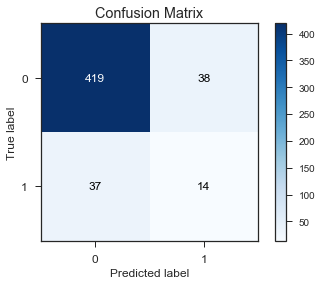

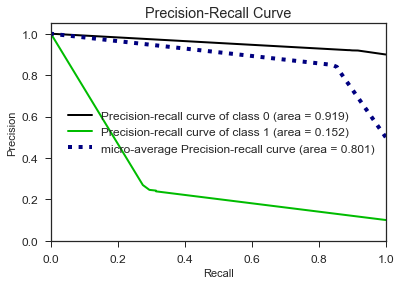

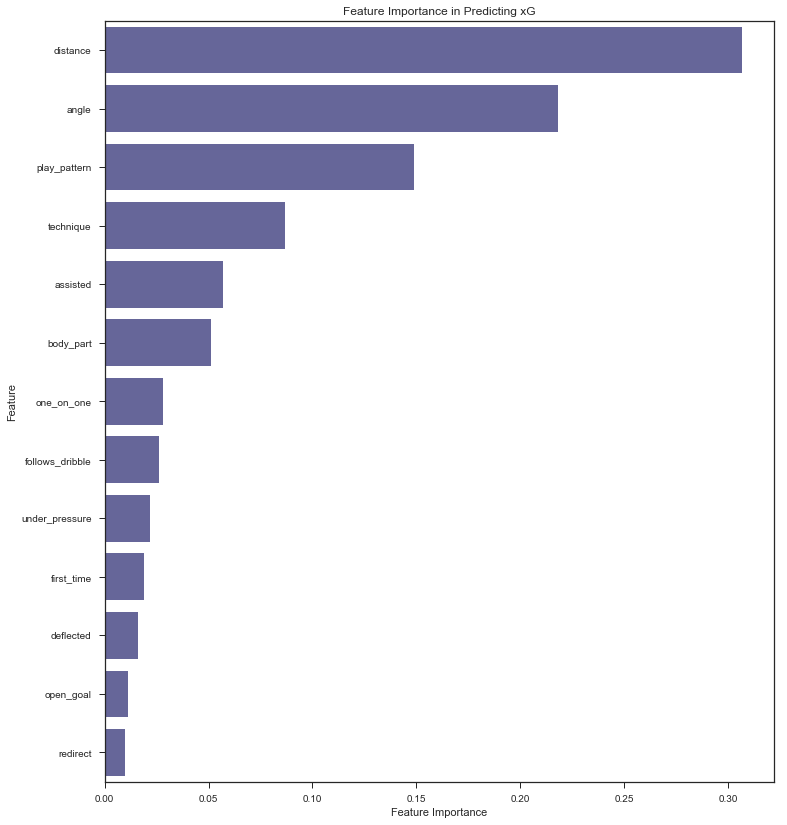

In [43]:
#EVALUATING
# Print results
print("Predicted goals (test set):", sum(y_pred))
print("Actual goals (test set):", sum(y_test))
print('')
print(metrics.classification_report(y_test, y_pred))
 
# Plot results
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
 
skplt.metrics.plot_precision_recall(y_test, y_pred_prob)
 
# Get feature importance
importances = pd.DataFrame({'feature':features.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=importances,
                color="blue", saturation=.2, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Feature Importance in Predicting xG')
plt.show()

In [62]:
# Using Random Forest
clf2 = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 0)
 
# Train the model
clf2.fit(X_train, y_train)
 
# Create predictions
y_pred2 = clf2.predict(X_test)
y_pred_prob2 = clf2.predict_proba(X_test)

Predicted goals (test set): 20
Sum of predicted goal probabilities (aka xG): 57.08
Actual goals (test set): 51

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       457
          1       0.35      0.14      0.20        51

avg / total       0.85      0.89      0.87       508



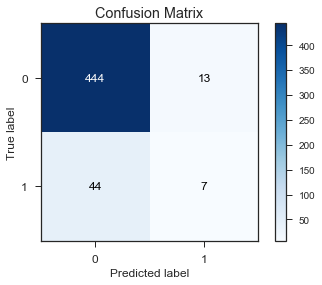

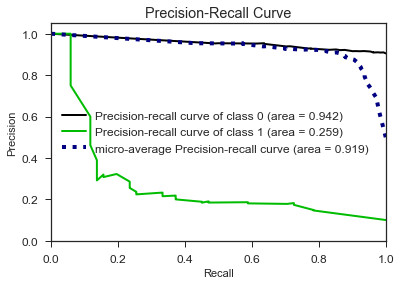

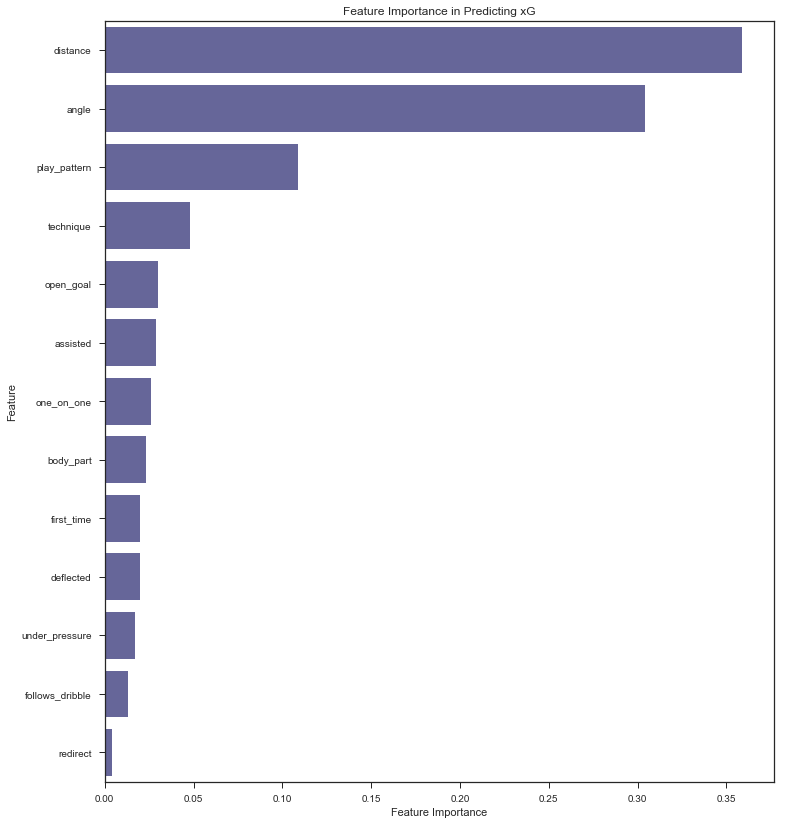

In [63]:
#EVALUATING RANDOM FOREST
# Print results
print("Predicted goals (test set):", sum(y_pred2))
print("Actual goals (test set):", sum(y_test))
print('')
print(metrics.classification_report(y_test, y_pred2))
 
# Plot results
skplt.metrics.plot_confusion_matrix(y_test, y_pred2)
 
skplt.metrics.plot_precision_recall(y_test, y_pred_prob2)
 
# Get feature importance
importances = pd.DataFrame({'feature':features.columns,'importance':np.round(clf2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=importances,
                color="blue", saturation=.2, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Feature Importance in Predicting xG')
plt.show()